# DeDop L1B Comparison

Use the following plot methods for displaying scaled waveform data:
* `comp.plot.waveforms_delta_im()` - to draw the waveforms difference image
* `comp.plot.waveforms_scatter()` - to draw the waveforms scatter plot
* `comp.p1/p2.plot.waveform_line()` - to draw a simple waveform line plot
* `comp.p1/p2.plot.waveform_im()` - to draw a waveform image
* `comp.p1/p2.plot.waveform_hist()` to draw a waveform histogram
* `comp.plot.locations()` - to draw the footprints of the two L1B products on a map

Use the following generic methods for displaying any other variables:
* `comp.p1/p2.plot.line(x, y)` - to draw two 1D variables (line plots)
* `comp.p1/p2.plot.im_line(z)` - to draw a 2D variable (images + and line plots)
* `comp.p1/p2.plot.im(z)` - to draw a 2D variable (images)

Usage hints:
* In menu **Cell** select **Run All** to run all notebook *cells*
* Place cursor over a any field or function in a cell and press **SHIFT** + **TAB** to display help on
  that element.
* Type `comp.` or `comp.plot.` then press **TAB** key to get a list of available
  elements of the `comp` and `comp.plot` objects for auto-completion.
* Some functions have a `color` argument. Please refer to the 
  [Matplotlib Colors API](http://matplotlib.org/api/colors_api.html) to learn how colors can be specified.
* Some functions have a `cmap` argument, which names a colour map. Please refer to the
  [Matplotlib Colormaps Reference](http://matplotlib.org/examples/color/colormaps_reference.html) 
  for possible names.


In [1]:
from dedop.ui.compare import compare_l1b_products
%matplotlib inline

In [2]:
comp = compare_l1b_products('C:\\Users\\Hans\\.dedop\\workspaces\\default\\configs\\myconf\\outputs\\L1B_CS_LTA__SIR1SAR_FR_20150331T034023_20150331T034235_C001.DBL_myconf.nc',
                            'C:\\Users\\Hans\\.dedop\\workspaces\\default\\configs\\default\\outputs\\L1B_CS_LTA__SIR1SAR_FR_20150331T034023_20150331T034235_C001.DBL_default.nc')

In [3]:
comp.plot.locations()

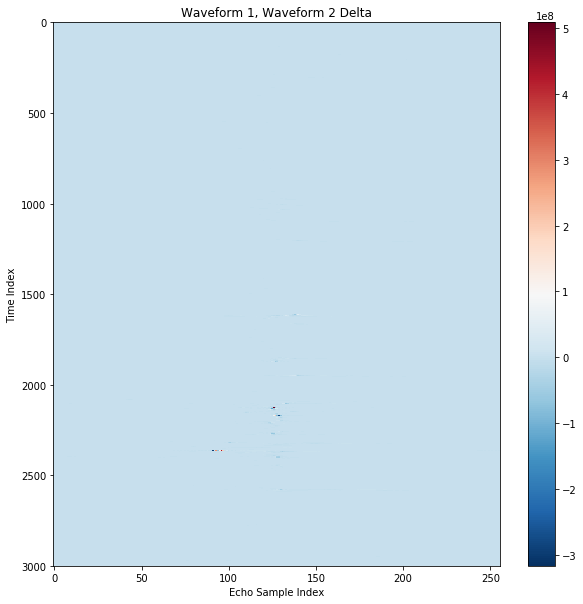

In [4]:
comp.plot.waveforms_delta_im()

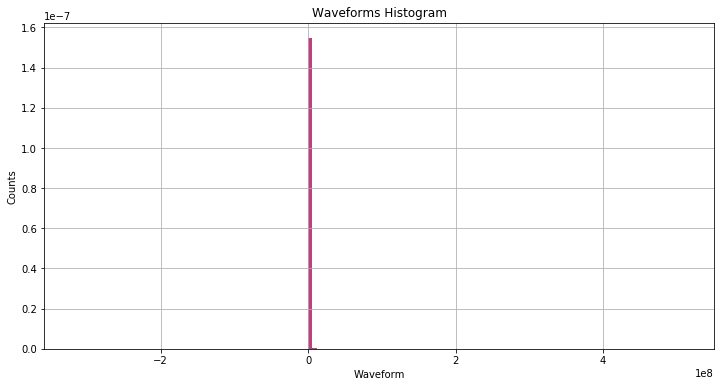

In [5]:
comp.plot.waveforms_hist()

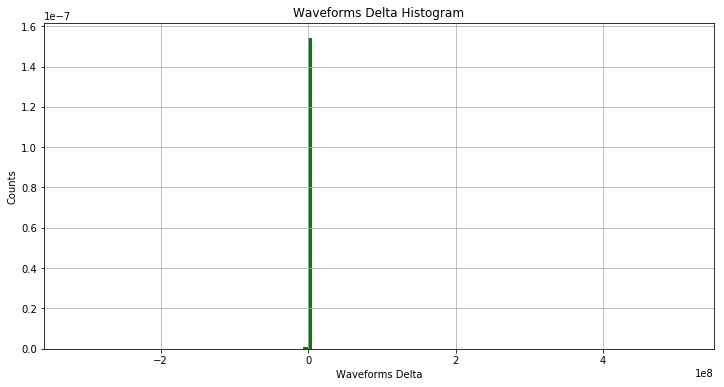

In [6]:
comp.plot.waveforms_delta_hist()

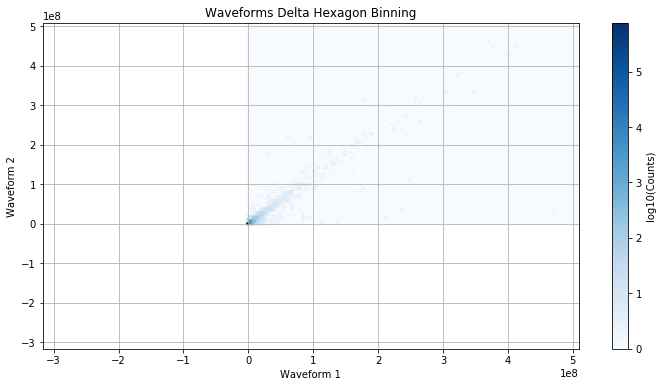

In [7]:
comp.plot.waveforms_hexbin()

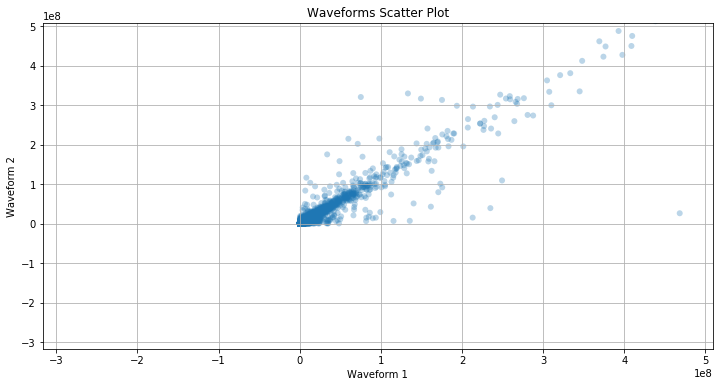

In [8]:
comp.plot.waveforms_scatter()

In [9]:
comp.waveforms

(array([[ 468.10027,  508.90389,  488.78742, ...,  106.14648,  158.93438,
          160.64642],
        [ 582.66428,  632.0281 ,  730.89841, ...,  172.34536,  228.272  ,
          297.32428],
        [ 568.96796,  649.1485 ,  791.10515, ...,  461.39478,  339.69727,
          362.95248],
        ..., 
        [ 660.03768,  700.84416,  591.83664, ...,  238.70364,  161.37108,
          427.75464],
        [ 608.38752,  635.06868,  708.97692, ...,  386.37744,  359.41092,
          945.11232],
        [ 880.19292,  802.14696,  828.40008, ...,  402.78564,  359.69628,
          575.14308]]),
 array([[  865.15088,   846.46111,   746.59211, ...,   143.24068,
           123.98023,   152.94224],
        [ 1150.77622,  1107.54721,   979.42955, ...,   215.4317 ,
           182.6176 ,   228.12933],
        [  964.16386,  1005.39549,   904.38513, ...,   594.9339 ,
           452.54924,   340.83863],
        ..., 
        [  663.31932,   678.30072,   861.0738 , ...,   279.36744,
           217.44432, 

In [10]:
comp.waveforms_delta

array([[-397.05061, -337.55722, -257.80469, ...,  -37.0942 ,   34.95415,
           7.70418],
       [-568.11194, -475.51911, -248.53114, ...,  -43.08634,   45.6544 ,
          69.19495],
       [-395.1959 , -356.24699, -113.27998, ..., -133.53912, -112.85197,
          22.11385],
       ..., 
       [  -3.28164,   22.54344, -269.23716, ...,  -40.6638 ,  -56.07324,
         191.1912 ],
       [-157.09068, -277.36992, -312.32652, ..., -340.2918 ,   39.9504 ,
         468.13308],
       [-204.88848, -391.51392, -367.82904, ...,  -68.62908,    2.71092,
          98.87724]])

In [11]:
comp.waveforms_delta_range

(-316536482.45099998, 508913071.88603997)

## Basic outlier detection in ``waveforms_delta`` using numpy

The following code is an example of how this Notebook may be used to do some basic statstics with 
[numpy](http://www.numpy.org/) or [scipy](https://www.scipy.org).

Here, we define probability bands whose widths are *2k* times the standard deviation centered on the mean (of a normal distribution) of ``waveforms_delta``. By doing this, any data points from the N samples that lie outside this probability band are considered to be outliers.

In [12]:
import numpy as np

x = comp.waveforms_delta
x_min, x_max = comp.waveforms_delta_range

mean = x.mean()
std = x.std()

k_max = (x_max - x_min) / std if std else 1

print()
print('mean =', mean, ' std =', std, '  k_max = ', k_max)
print()

for k in [1., 2., 3., 4., 5.]:
    num_outliers = np.logical_or(x < mean - k * std, x > mean + k * std).sum()
    num_within = x.size - num_outliers
    ratio_outliers = num_outliers / x.size
    ratio_within = 1.0 - ratio_outliers 

    print('k =', k, ':')
    print('  num_within =', num_within, ' ratio_within =', 100 * ratio_within, '%')
    print('  num_outliers =', num_outliers, ' ratio_outliers =', 100 * ratio_outliers, '%')



mean = -12182.6358547  std = 1717668.95115   k_max =  480.563820977

k = 1.0 :
  num_within = 764645  ratio_within = 99.5963498249 %
  num_outliers = 3099  ratio_outliers = 0.403650175058 %
k = 2.0 :
  num_within = 766261  ratio_within = 99.8068366539 %
  num_outliers = 1483  ratio_outliers = 0.193163346115 %
k = 3.0 :
  num_within = 766791  ratio_within = 99.8758700817 %
  num_outliers = 953  ratio_outliers = 0.124129918306 %
k = 4.0 :
  num_within = 767049  ratio_within = 99.9094750333 %
  num_outliers = 695  ratio_outliers = 0.0905249666556 %
k = 5.0 :
  num_within = 767202  ratio_within = 99.9294035512 %
  num_outliers = 542  ratio_outliers = 0.0705964488163 %


In [13]:
(x < x_min + 1e7).sum()

1

In [14]:
(x > x_max - 1e7).sum()

2